<a href="https://colab.research.google.com/github/suckgitariuses/Machine_Learning/blob/main/JS06_REGRESI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Adinda Mirza Devani**

**TI_3B**

**2341720046**

**REGRESI**

**Langkah 1: Persiapan Data**

In [1]:
from google.colab import files
uploaded = files.upload() #upload dataset

Saving dataset.csv to dataset.csv


**Langkah 2: Import Library**

In [2]:
# import package
import numpy as np
import pandas as pd

**Langkah 3: Baca Data**

In [4]:
# baca data dari file CSV
data = pd.read_csv('dataset.csv')

**Langkah 4: Pemahaman Terhadap Data**

In [5]:
# melihat beberapa data awal
data.head()

# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


**Langkah 5: Visualisasi Data**

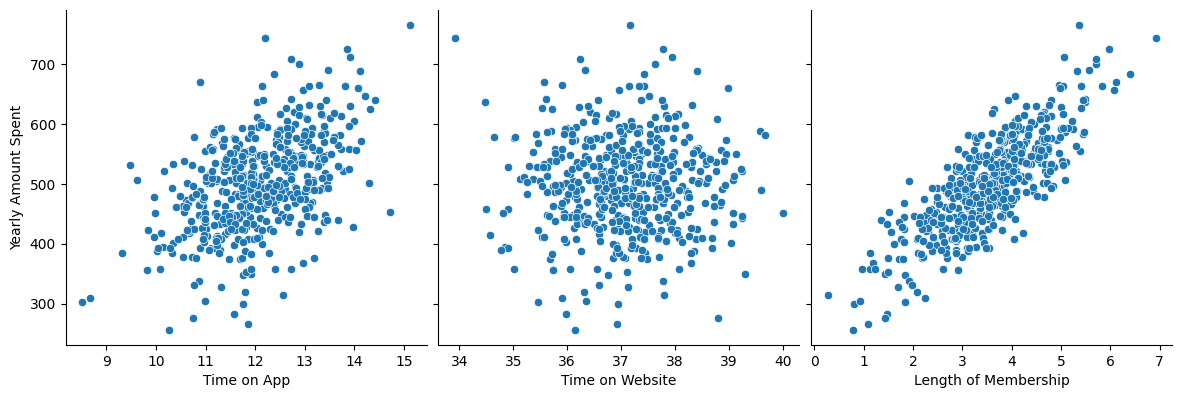

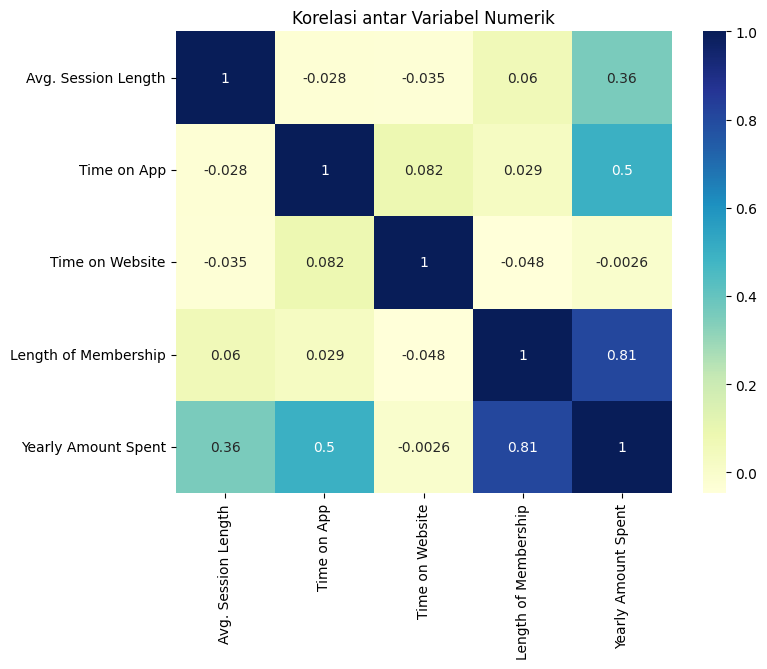

In [7]:
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# pairplot untuk melihat hubungan antar variabel terhadap target
sns.pairplot(data,
             x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent',
             height=4, aspect=1, kind='scatter')
plt.show()

# pilih hanya kolom numerik
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# visualisasi korelasi dengan heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_data.corr(), cmap="YlGnBu", annot=True)
plt.title('Korelasi antar Variabel Numerik')
plt.show()


**Langkah 6: Regresi Linier**

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.669
Model:                             OLS   Adj. R-squared:                  0.668
Method:                  Least Squares   F-statistic:                     702.9
Date:                 Mon, 27 Oct 2025   Prob (F-statistic):           1.59e-85
Time:                         08:09:31   Log-Likelihood:                -1841.3
No. Observations:                  350   AIC:                             3687.
Df Residuals:                      348   BIC:                             3694.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

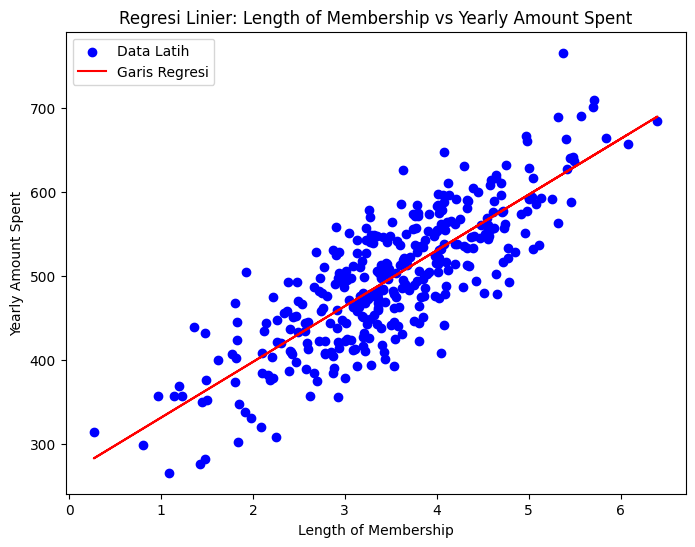

In [9]:
# Membuat variabel bebas X dan target y
X = data['Length of Membership']
y = data['Yearly Amount Spent']
# pisahkan variabel X dan target y

# Pembagian data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, test_size=0.3, random_state=100
)
# bagi data menjadi data latih (70%) dan data uji (30%) menggunakan train_test_split

# Training model regresi linier menggunakan library StatsModels
import statsmodels.api as sm

# Tambahkan konstanta (intercept)
X_train_sm = sm.add_constant(X_train)

# Buat dan latih model
lr = sm.OLS(y_train, X_train_sm).fit()

# Tampilkan ringkasan hasil model
print(lr.summary())

# Ambil nilai intercept dan slope dari model
intercept, slope = lr.params

# Visualisasikan garis regresi pada data latih
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color='blue', label='Data Latih')

# Gambar garis regresi berdasarkan persamaan y = intercept + slope * X
plt.plot(X_train, intercept + slope * X_train, color='red', label='Garis Regresi')

# Tambahkan label dan judul
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
plt.title('Regresi Linier: Length of Membership vs Yearly Amount Spent')
plt.legend()
plt.show()

**Langkah 7: Analisis Residual**

/tmp/ipython-input-3224887101.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


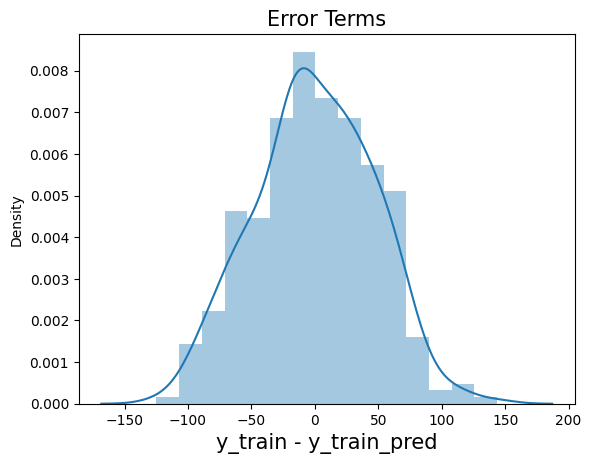

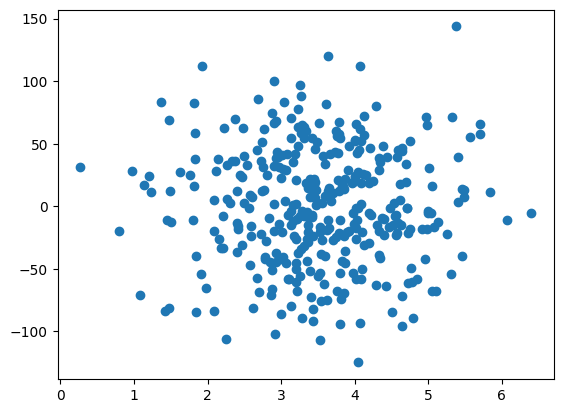

In [10]:
# prediksi nilai y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

# Menghitung residual
res = (y_train - y_train_pred)
# lakukan prediksi nilai y dari data latih dan hitung residual.

# histogram residual
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# Scatter plot residual
plt.scatter(X_train, res)
plt.show()

**Langkah 8: Prediksi pada Data Uji dan Evaluasi Model**

In [12]:
# ====================================================
# Prediksi pada data uji
# ====================================================
X_test_sm = sm.add_constant(X_test)

# lakukan prediksi pada data uji
y_test_pred = lr.predict(X_test_sm)

# ====================================================
# Evaluasi model menggunakan R-squared
# ====================================================
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
print("Nilai R-squared pada data uji:", r_squared)


Nilai R-squared pada data uji: 0.611948913768747


**Langkah 9: Visualisasi Hasil**

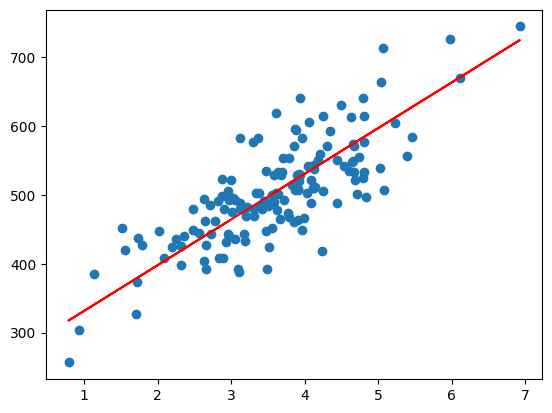

In [13]:
# visualisasi hasil
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()